# iSIM Clustering

---

## Miranda-Quintana Group, Department of Chemistry, University of Florida

---

This notebook is an example on how iSIM can be used as linkage criterion for hierarchical clustering. 
Althought iSIM has linear scaling, hierarchical clustering scales quadratically. The purpose of this is to show possible applications of iSIM. This is a proof of principle. 

In [1]:
from iSIM.clustering import hierarchical_clustering
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram

### Read the fingerprints from a .npy file

For creation of fingerprints please reference iSIM_example.ipynb in the iSIM repo

In [2]:
fingerprints = np.load('CHEMBL214_Ki_fps.npy')

Perform hierarchical clustering using iSIM

In this case we are going to use only 100 of the fingerprints, since hierarchical clustering takes a long time to compute.

In [3]:
fingerprints = fingerprints[:100]

tree, Z = hierarchical_clustering(fingerprints, n_ary='SM') # ---> n_ary='SM', 'JT' or 'RR'

Plot a dendrogram of the clusterin

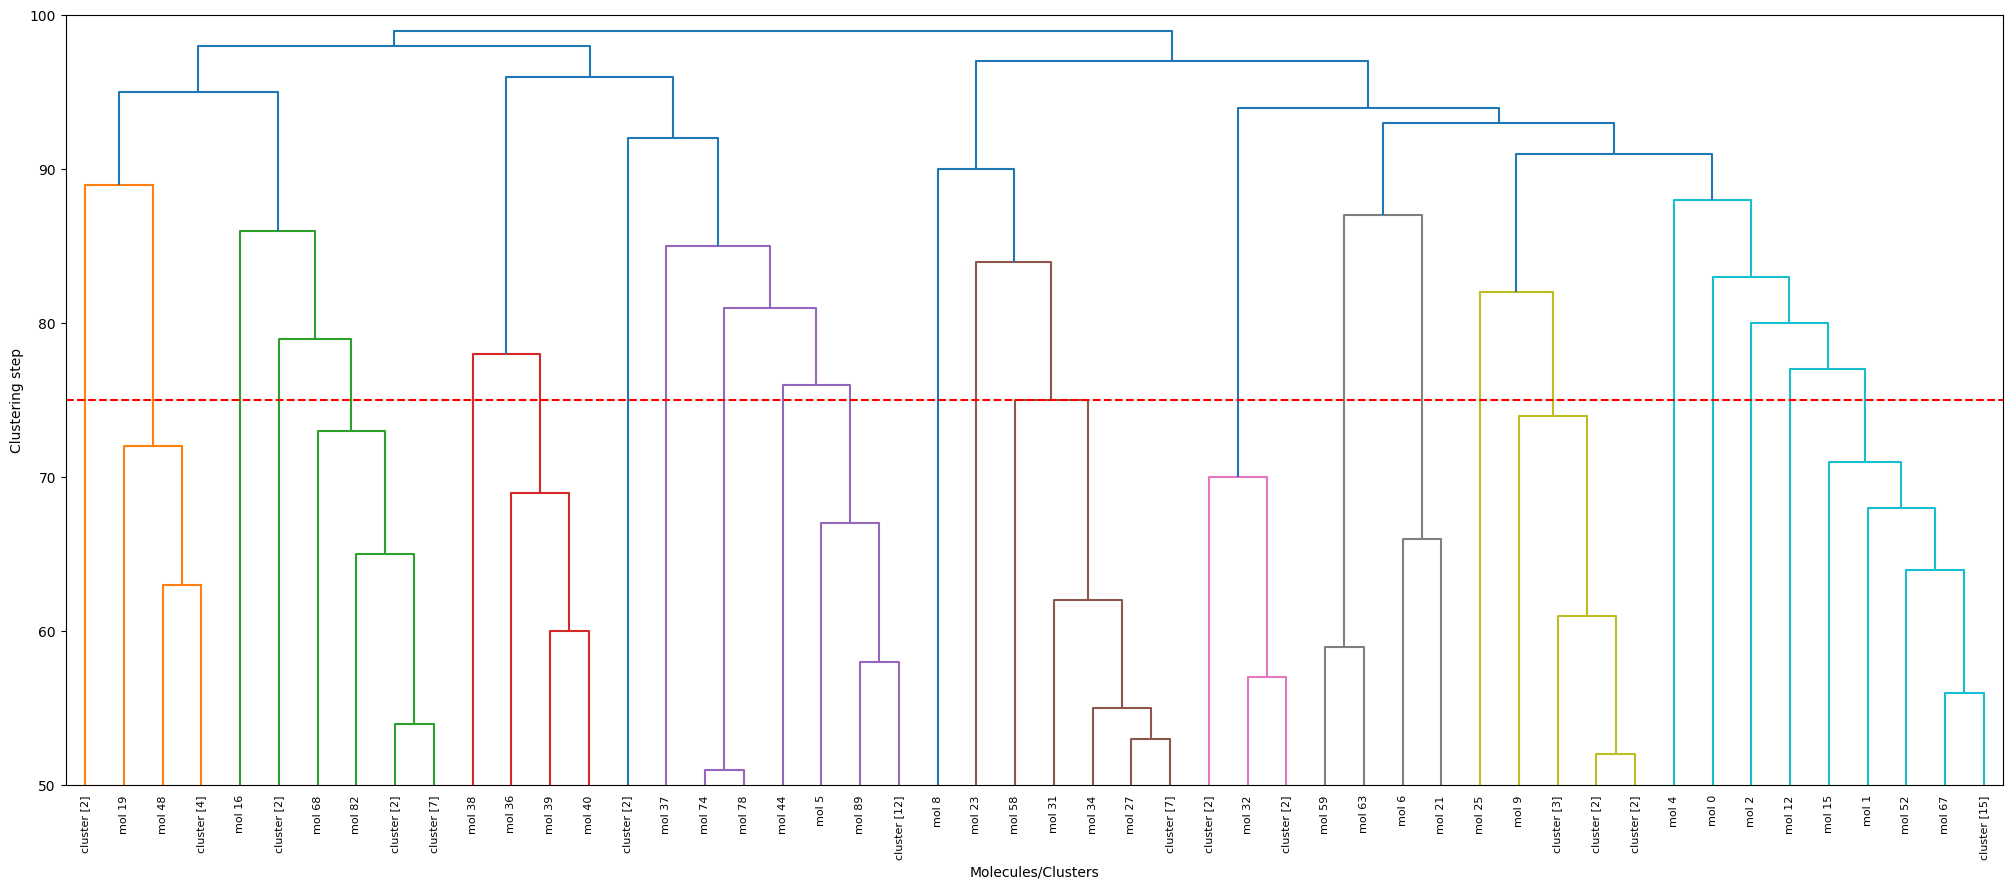

In [4]:
n = len(tree[0])
def llf(id):
    if id < n:
        return 'mol ' + str(id)
    else:
        return 'cluster ' + '[' + str(int(Z[id - n][3])) + ']'
    

# Plot the dendogram
# Add as labels the number of elements in each cluster
plt.figure(figsize=(25, 10))
d = dendrogram(Z, p=50, 
           truncate_mode = 'lastp', 
           leaf_rotation=90., 
           leaf_font_size=8, 
           show_contracted=True,
           color_threshold=n-10,
           show_leaf_counts=True,
           leaf_label_func=llf,
           count_sort=True)
plt.axhline(y=n-25, color='r', linestyle='--', label='cutoff')
plt.ylim(n-50, n)

# Annotate axis
plt.ylabel('Clustering step')
plt.xlabel('Molecules/Clusters')

plt.show()